# Problem 4

In [1]:
import sys

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print(f"Python version: {sys.version}\nNumpy version: {np.__version__}\nMatplotlib version: {matplotlib.__version__}")

Python version: 3.11.8 (main, Feb 26 2024, 15:36:12) [Clang 14.0.6 ]
Numpy version: 1.26.4
Matplotlib version: 3.8.0


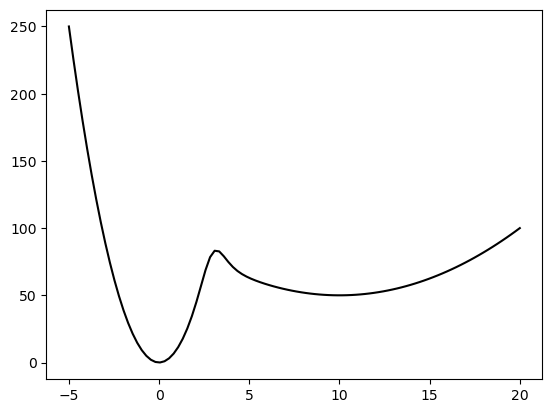

In [2]:
np.seterr(invalid='ignore', over='ignore')  # suppress warning caused by division by inf

def f(x):
    return 1/(1 + np.exp(3*(x-3))) * 10 * x**2  + 1 / (1 + np.exp(-3*(x-3))) * (0.5*(x-10)**2 + 50)

def fprime(x):
    return 1 / (1 + np.exp((-3)*(x-3))) * (x-10) + 1/(1 + np.exp(3*(x-3))) * 20 * x + (3* np.exp(9))/(np.exp(9-1.5*x) + np.exp(1.5*x))**2 * ((0.5*(x-10)**2 + 50) - 10 * x**2) 

x = np.linspace(-5,20,100)
plt.plot(x,f(x), 'k')
plt.show()

In [3]:
def gradient_descent(epochs, alpha):
    theta = np.random.uniform(x.min(), x.max())  # randomly initialises theta in [x.min(), x.max())=[-5,20)

    for _ in range(epochs):  # performs GD for a given number of epochs
        theta = theta - alpha * fprime(theta)
    
    return theta  # returns final theta value after GD

In [4]:
def determine_minima(theta, tolerance=1e-2):
    if abs(theta - 0) < tolerance:
        return "sharp"
    elif abs(theta - 10) < tolerance:
        return "wide"
    else:
        raise ValueError(f"theta did not converge to a minimum (within tolerance={1e-2})")

In [5]:
def run_experiment(num_trials, epochs, learning_rate):
    results = {"sharp": 0, "wide": 0, "failed": 0}

    digits = np.floor(np.log10(num_trials)).astype(int) + 1
    for i in range(num_trials):
        print_i = str(i).zfill(digits)
        print(f"Trial num: {print_i}/{num_trials}", end="\r")
        gd_theta = gradient_descent(epochs, learning_rate)
        try:
            results[determine_minima(gd_theta)] += 1
        except ValueError:
            results["failed"] += 1
            
    # results = {k: str(v).zfill(digits) for k, v in results.items()}
    results = {k: f"{(v/num_trials) * 100:6.2f}" for k, v in results.items()}  # convert results to a percentage
    
    print(f"""In {num_trials} trials (with {epochs} epochs each) using learning rate alpha = {learning_rate}:          
   Convergence to sharp minimum: {results['sharp']}%
    Convergence to wide minimum: {results['wide']}%
Failed to converge to a minimum: {results['failed']}%
""")

In [6]:
num_trials = 150
epochs = 5000

for alpha in (0.01, 0.30, 4.00):
    run_experiment(num_trials, epochs, alpha)

In 150 trials (with 5000 epochs each) using learning rate alpha = 0.01:          
   Convergence to sharp minimum:  33.33%
    Convergence to wide minimum:  66.67%
Failed to converge to a minimum:   0.00%

In 150 trials (with 5000 epochs each) using learning rate alpha = 0.3:          
   Convergence to sharp minimum:   0.00%
    Convergence to wide minimum: 100.00%
Failed to converge to a minimum:   0.00%

In 150 trials (with 5000 epochs each) using learning rate alpha = 4.0:          
   Convergence to sharp minimum:   0.00%
    Convergence to wide minimum:   0.00%
Failed to converge to a minimum: 100.00%



# Problem 5

In [7]:
import numpy as np

class Convolution1d:
    def __init__(self, filt):
        self.__filt = filt
        self.__r = filt.size
        self.T = TransposedConvolution1d(self.__filt)

    def __matmul__(self, vector) :
        r, n = self.__r, vector.size
        
        return np.asarray([np.dot(
            self.__filt, 
            vector[i:i+r]
        ) for i in range(n-r+1)])  # IMPLEMENTATION
    
class TransposedConvolution1d :
    '''
    Transpose of 1-dimensional convolution operator used for the 
    transpose-convolution operation A.T@(...)
    '''
    def __init__(self, filt) :
        self.__filt = filt
        self.__r = filt.size

    def __matmul__(self, vector) :
        r = self.__r
        n = vector.size + r - 1
        
        # old bad solution that didn't work
        # return_array = np.ndarray(n)
        # for i in range(n):
        #     filt_start = max(0, i-(n-r))  # on the (n-r+1)th row the filter start is offset
        #     filt_end = min(i+1, r)
        #     v_start = max(0, i-r)  # on the (r+1)th row the vector start is offset
        #     v_end = v_start + filt_end - filt_start
        #     return_array[i] = np.sum(np.flip(self.__filt[filt_start:filt_end])*vector[v_start:v_end])
        # return return_array
    
        return np.asarray([np.dot(
            np.flip(self.__filt), 
            np.concatenate((np.zeros(r-1), vector, np.zeros(r-1)))[i:i+r]
        ) for i in range(n)])  # IMPLEMENTATION

def huber_loss(x) :
    return np.sum( (1/2)*(x**2)*(np.abs(x)<=1) + (np.sign(x)*x-1/2)*(np.abs(x)>1) )
def huber_grad(x) :
    return x*(np.abs(x)<=1) + np.sign(x)*(np.abs(x)>1)


r, n, lam = 3, 20, 0.1

np.random.seed(0)
k = np.random.randn(r)
b = np.random.randn(n-r+1)
A = Convolution1d(k)
#from scipy.linalg import circulant
#A = circulant(np.concatenate((np.flip(k),np.zeros(n-r))))[r-1:,:]


x = np.zeros(n)
alpha = 0.01
for _ in range(100) :
    x = x - alpha*(A.T@(huber_grad(A@x-b))+lam*x)

print(huber_loss(A@x-b)+0.5*lam*np.linalg.norm(x)**2)

0.4587586843129764
